# Data Analysis of the Chicago Dataset

In this Jupyter Notebook we will analyze a bike sharing dataset of the city Chicago of the year 2019. We will also include the hourly weather data of the city during the same time. In the first part we will visualize the data and try to develop a deeper understanding of the user types and recurring bahavioral patterns. In the second part we use this knowledge to develop a predicition model which forecasts future demand.

## Getting started: importing the data and getting it in the right format

At first we import all of the required libraries in this notebook. In this case we import *NumPy, Pandas, Matplotlib and Seaborn*. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Next we import the datasets. This is in perticular the dataset of the city Chicago of the year 2019 and the associated weather data. We do this with the library Pandas, therefore both datasets have now the datatype "Pandas Dataframe" ([documentation](https://pandas.pydata.org/docs/reference/frame.html)). 

The next cell is for importing the files a local Jupyter Notebook with the files in the same folder as the Jupyter Notebook. If you have stored the data sources in a different folder, you need to adapt the path. If you want to run the code on Google Colab, you can replace the cell with this code snippet:

```
# für Google Colab
from google.colab import drive
drive.mount('/content/drive')
chicago_set = pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/chicago_2019.csv')
weather_set = pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/weather_hourly_chicago.csv')
coordinates_sets = [pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202004-divvy-tripdata.csv')]
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202005-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202006-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202007-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('/content/drive/MyDrive/DSML: Google Gurus/Data Sources/202008-divvy-tripdata.csv'))```



In [ ]:
# für lokale Jupyter Notebooks
chicago_set = pd.read_csv('chicago_2019.csv')
weather_set = pd.read_csv('weather_hourly_chicago.csv')
coordinates_sets = [pd.read_csv('202004-divvy-tripdata.csv')]
coordinates_sets.append(pd.read_csv('202005-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202006-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202007-divvy-tripdata.csv'))
coordinates_sets.append(pd.read_csv('202008-divvy-tripdata.csv'))

We use the commands head() and info() to get a feeling for the data

In [ ]:
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


In [ ]:
chicago_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.0+ MB


So we know that we have a dataset with 3.8 million entries and we have multiple columns, two columns for the time (*start_time and end_time*), four columns for the location (*start_station_id, end_station_id and the respective names*) and the *bike_id* and *user_type*. 

In [ ]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


We first investigate the time data we got. Therefore, we need to transform the data type of the columns "*start_time*" and "*end_time*" from String to Datetime. This allows us in the following code snippet to add another column to our dataframe which we call *duration*. This is the difference between the end_time and the start_time.

In [ ]:
chicago_set['start_time'] = pd.to_datetime(chicago_set['start_time'])
chicago_set['end_time'] = pd.to_datetime(chicago_set['end_time'])

chicago_set['duration'] = chicago_set['end_time'] - chicago_set['start_time']
chicago_set.describe()

,start_station_id,end_station_id,bike_id,duration
count,3.818004e+06,3.818004e+06,3.818004e+06,3818004
mean,2.016659e+02,2.026363e+02,3.380252e+03,0 days 00:24:10.451397903
std,1.560798e+02,1.562388e+02,1.902511e+03,0 days 08:17:32.263421746
min,1.000000e+00,1.000000e+00,1.000000e+00,-1 days +23:03:38
25%,7.700000e+01,7.700000e+01,1.727000e+03,0 days 00:06:51
50%,1.740000e+02,1.740000e+02,3.451000e+03,0 days 00:11:49
75%,2.890000e+02,2.910000e+02,5.046000e+03,0 days 00:21:24
max,6.730000e+02,6.730000e+02,6.946000e+03,123 days 01:20:22


After calculating the duration of the rides we can see that the maximum duration of a ride was over 123 days on the minimum duration of a ride was around -1 hour. We can assume that there a other cases where the data is inconclusive, therefore in the next step we will clean our dataset and delete these outliers.

### Cleaning up our data

### Examples of invalid data

In [ ]:
import datetime
chicago_set[chicago_set['duration'] >= datetime.timedelta(days=1)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3503522,2019-11-03 18:05:32,2019-11-05 14:57:28,176,671,Clark St & Elm St,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),3703,Customer,1 days 20:51:56
2339128,2019-08-16 13:22:32,2019-08-17 13:26:26,229,304,Southport Ave & Roscoe St,Broadway & Waveland Ave,2260,Customer,1 days 00:03:54
1142426,2019-06-10 12:22:36,2019-06-11 23:36:56,218,120,Wells St & 19th St,Wentworth Ave & Cermak Rd (Temp),4100,Customer,1 days 11:14:20
3395289,2019-10-22 03:50:37,2019-10-30 01:11:10,197,381,Michigan Ave & Madison St,Western Ave & Monroe St,978,Subscriber,7 days 21:20:33
3803901,2019-12-27 14:26:41,2019-12-28 21:26:13,102,110,Stony Island Ave & 67th St,Dearborn St & Erie St,2357,Customer,1 days 06:59:32


In [ ]:
chicago_set[chicago_set['duration'] <= datetime.timedelta(days=0)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3498441,2019-11-03 01:53:08,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,2142,Customer,-1 days +23:11:45
3498440,2019-11-03 01:51:55,2019-11-03 01:04:33,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,3338,Customer,-1 days +23:12:38
3498435,2019-11-03 01:47:49,2019-11-03 01:02:40,229,87,Southport Ave & Roscoe St,Racine Ave & Fullerton Ave,964,Subscriber,-1 days +23:14:51
3498442,2019-11-03 01:53:10,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,5877,Customer,-1 days +23:11:43
3498437,2019-11-03 01:50:31,2019-11-03 01:04:25,298,258,Lincoln Ave & Belle Plaine Ave,Logan Blvd & Elston Ave,4179,Subscriber,-1 days +23:13:54


### Visualization of different quantile deletion of outliers & invalid data from our data set

(0.125% Quantile) All trips with a duration outside of 0 days 00:01:19 to 0 days 09:01:02.970000002 will be removed!
That is 9263 out of 3818004 entries!


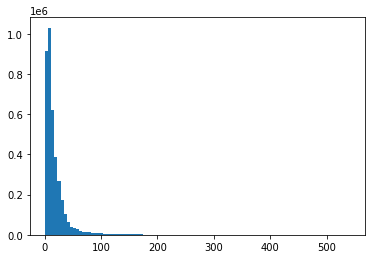

count                      3808741
mean     0 days 00:18:22.340564506
std      0 days 00:23:21.735330331
min                0 days 00:01:19
25%                0 days 00:06:52
50%                0 days 00:11:49
75%                0 days 00:21:21
max                0 days 09:00:59
Name: duration, dtype: object

(0.25% Quantile) All trips with a duration outside of 0 days 00:01:33 to 0 days 03:48:11.992500 will be removed!
That is 19025 out of 3818004 entries!


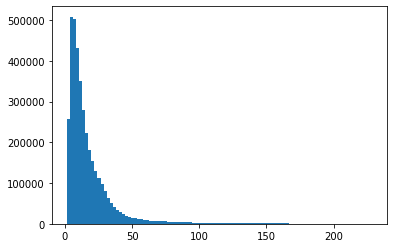

count                      3798979
mean     0 days 00:18:00.690816927
std      0 days 00:20:31.001258644
min                0 days 00:01:33
25%                0 days 00:06:53
50%                0 days 00:11:49
75%                0 days 00:21:19
max                0 days 03:48:11
Name: duration, dtype: object

(0.5% Quantile) All trips with a duration outside of 0 days 00:01:49 to 0 days 02:42:28 will be removed!
That is 37931 out of 3818004 entries!


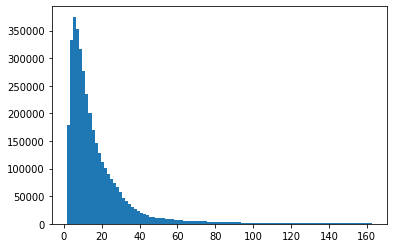

count                      3780073
mean     0 days 00:17:37.940601940
std      0 days 00:18:45.168339717
min                0 days 00:01:49
25%                0 days 00:06:54
50%                0 days 00:11:49
75%                0 days 00:21:15
max                0 days 02:42:28
Name: duration, dtype: object



In [ ]:
%matplotlib inline
# Data to remove from top and bottom
def get_outside_time_frame_data(df, dt_column, lower_bound, upper_bound):
    return df[(df[dt_column] < lower_bound) | (df[dt_column] > upper_bound)]

quantiles = [0.00125, 0.0025, 0.005] # (0.125%; 0.25%; 0.5%) * 2
for quantile in quantiles:
    # amount = len(chicago_set[(chicago_set['duration'] < chicago_set.duration.quantile(quantile)) | (chicago_set['duration'] > chicago_set.duration.quantile(1 - quantile))])
    lower_bound = chicago_set.duration.quantile(quantile)
    upper_bound = chicago_set.duration.quantile(1 - quantile)
    amount = get_outside_time_frame_data(chicago_set, 'duration', lower_bound, upper_bound)
    print('(' + str(quantile*100) + '% Quantile) All trips with a duration outside of ' + str(lower_bound) + ' to ' + str(upper_bound) + ' will be removed!')
    print('That is ' + str(len(amount)) + ' out of ' + str(len(chicago_set)) + ' entries!')
    chicago_set_clean = chicago_set.drop(amount.index)
    plt.hist(chicago_set_clean['duration']/pd.Timedelta(minutes=1), bins=100)
    plt.show()
    print(str(chicago_set_clean['duration'].describe()) + '\n')

We decided to go with the last 0.5% from each end, keeping 99% of the data. We felt this was a good comprise between not keeping unrealistic data and at the same time not deleting too many entries.

### Find out the latitude and longitude of the stations

In [ ]:
coordinates_sets[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


##### Get the relevant data, i.e. station_name, station_id, latitude & longitude

In [ ]:
coordinates = pd.DataFrame()
for coordinates_set in coordinates_sets:
    coordinates1 = coordinates_set[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
    coordinates2 = coordinates_set[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']]

    coordinates1 = coordinates1.rename(columns={'start_station_name': 'station_name', 'start_station_id': 'station_id', 'start_lat': 'latitude', 'start_lng':'longitude'})
    coordinates2 = coordinates2.rename(columns={'end_station_name': 'station_name', 'end_station_id': 'station_id', 'end_lat': 'latitude', 'end_lng':'longitude'})

    coordinates_new = pd.concat([coordinates1, coordinates2], ignore_index = True)
    coordinates = pd.concat([coordinates, coordinates_new], ignore_index = True)
    print(coordinates_new['station_name'].nunique())
print(coordinates['station_name'].nunique())

607
611
619
622
636
647


In [ ]:
coordinates['station_id'] = coordinates['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_dropped = coordinates.dropna()
coordinates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583982 entries, 0 to 3603791
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   station_name  object 
 1   station_id    float64
 2   latitude      float64
 3   longitude     float64
dtypes: float64(3), object(1)
memory usage: 136.7+ MB


#### Get all unique rows based on station_id

In [ ]:
coordinates_unique = coordinates_dropped.drop_duplicates(subset = ['station_id'], keep = 'last')
#coordinates_unique['station_id'] = coordinates_unique['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_unique = coordinates_unique.dropna()
coordinates_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1211447 to 3603791
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  634 non-null    object 
 1   station_id    634 non-null    float64
 2   latitude      634 non-null    float64
 3   longitude     634 non-null    float64
dtypes: float64(3), object(1)
memory usage: 24.8+ KB


In [ ]:
coordinates_unique = coordinates_unique[np.isfinite(coordinates_unique['station_id'])]
coordinates_unique['station_id'] = coordinates_unique['station_id'].astype('int64')
coordinates_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1211447 to 3603791
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  634 non-null    object 
 1   station_id    634 non-null    int64  
 2   latitude      634 non-null    float64
 3   longitude     634 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [ ]:
print(chicago_set_clean['start_station_id'].nunique())
print(chicago_set_clean['end_station_id'].nunique())
chicago_set_clean.info()

616
617
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780073 entries, 0 to 3818003
Data columns (total 9 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration            timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 288.4+ MB


In [ ]:
chicago_set_merge = chicago_set_clean.merge(coordinates_unique, how='left', left_on='start_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'start_latitude', 'longitude': 'start_longitude'})
chicago_set_merge = chicago_set_merge.merge(coordinates_unique, how='left', left_on='end_station_id', right_on='station_id')
chicago_set_merge = chicago_set_merge.rename(columns={'latitude': 'end_latitude', 'longitude': 'end_longitude'})
chicago_set_merge = chicago_set_merge.drop(['station_name_x', 'station_id_x', 'station_name_y', 'station_id_y'],axis = 1)
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043


In [ ]:
chicago_set_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780073 entries, 0 to 3780072
Data columns (total 13 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration            timedelta64[ns]
 9   start_latitude      float64        
 10  start_longitude     float64        
 11  end_latitude        float64        
 12  end_longitude       float64        
dtypes: datetime64[ns](2), float64(4), int64(3), object(3), timedelta64[ns](1)
memory usage: 403.8+ MB


### We have multiple Stations not included in the data set we get the location from:
##### DIVVY Map Frame B/C Station, DIVVY CASSETTE REPAIR MOBILE STATION, Ellis Ave & 60th St, TS ~ DIVVY PARTS TESTING, Sedgwick St & Huron St, Special Events, LBS - BBB La Magie
Since many of these Station names don't seem like actual stations we could simply delete them from the data set since they only total 83 entries.
Otherwise the entries could be manually added with the command
extra = {'station_name': 'DIVVY Map Frame B/C Station', 'station_id': 360, 'latitude': -1, 'longitude': -1}
coordinates_unique = coordinates_unique.append(extra, ignore_index = True)

In [ ]:
chicago_set_merge.loc[chicago_set_merge.isnull().any(axis=1)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude
13107,2019-01-04 11:15:31,2019-01-04 11:26:25,119,360,Ashland Ave & Lake St (Temp),DIVVY Map Frame B/C Station,3360,Subscriber,0 days 00:10:54,41.885920,-87.667170,NaN,NaN
143446,2019-02-13 16:57:06,2019-02-13 17:26:24,360,170,DIVVY Map Frame B/C Station,Clinton St & 18th St,4644,Subscriber,0 days 00:29:18,NaN,NaN,41.857950,-87.640826
152065,2019-02-15 13:17:37,2019-02-15 13:23:46,360,119,DIVVY Map Frame B/C Station,Ashland Ave & Lake St (Temp),143,Subscriber,0 days 00:06:09,NaN,NaN,41.885920,-87.667170
185160,2019-02-26 08:26:07,2019-02-26 08:52:38,348,360,California Ave & 21st St,DIVVY Map Frame B/C Station,4564,Subscriber,0 days 00:26:31,41.853804,-87.695742,NaN,NaN
195239,2019-02-28 13:46:42,2019-02-28 15:29:33,199,360,Wabash Ave & Grand Ave,DIVVY Map Frame B/C Station,6374,Subscriber,0 days 01:42:51,41.891466,-87.626761,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709240,2019-07-15 08:07:01,2019-07-15 08:13:02,128,360,Damen Ave & Chicago Ave,DIVVY Map Frame B/C Station,4129,Subscriber,0 days 00:06:01,41.895769,-87.677220,NaN,NaN
1751342,2019-07-17 16:42:19,2019-07-17 16:49:45,350,360,Ashland Ave & Chicago Ave,DIVVY Map Frame B/C Station,5604,Subscriber,0 days 00:07:26,41.895966,-87.667747,NaN,NaN
2122276,2019-08-06 13:28:35,2019-08-06 13:33:00,128,360,Damen Ave & Chicago Ave,DIVVY Map Frame B/C Station,3153,Subscriber,0 days 00:04:25,41.895769,-87.677220,NaN,NaN
2516231,2019-08-27 18:31:46,2019-08-27 18:50:56,360,203,DIVVY Map Frame B/C Station,Western Ave & 21st St,5610,Subscriber,0 days 00:19:10,NaN,NaN,41.854109,-87.685838


### Drop rows with null values

In [ ]:
chicago_set_merge = chicago_set_merge.dropna()

Haversine method from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

### Calculate Haversine distance for unique start and stop combinations and merge it back into chicago set

In [ ]:
chicago_set_distance = chicago_set_merge[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]
chicago_set_distance = chicago_set_distance.drop_duplicates(subset = ['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], keep = 'last')
chicago_set_distance['distance'] = chicago_set_distance.apply(lambda x : haversine(x['start_latitude'], x['start_longitude'], x['end_latitude'], x['end_longitude'],) , axis=1)
chicago_set_merge = chicago_set_merge.merge(chicago_set_distance, how='left', on=['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'])
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude,distance
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384,2.404368
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155,0.162734
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234,3.307160
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280,7.325289
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043,1.078803



### Average speed in meters per second

In [ ]:
chicago_set_merge['speed'] = chicago_set_merge['distance'] * 1000 / chicago_set_merge['duration'].dt.total_seconds()
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,start_longitude,end_latitude,end_longitude,distance,speed
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,-87.626761,41.891578,-87.648384,2.404368,6.165046
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,-87.627734,41.876268,-87.629155,0.162734,0.369012
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,-87.656495,41.868563,-87.686234,3.307160,3.989336
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,-87.697153,41.902973,-87.631280,7.325289,4.108406
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,-87.621743,41.892278,-87.612043,1.078803,2.963746


## Integrate Weather Data into the Dataset

In [ ]:
# adding the weather data into the visulisation
weather_set['date_time'] = pd.to_datetime(weather_set['date_time'])
weather_set_2019 = weather_set.copy()
weather_set_2019 = weather_set_2019[pd.to_datetime(weather_set_2019['date_time']).dt.year == 2019]
weather_set_2019['month'] = pd.to_datetime(weather_set_2019['date_time']).dt.month
weather_set_2019['day'] = pd.to_datetime(weather_set_2019['date_time']).dt.day
weather_set_2019['hour'] = pd.to_datetime(weather_set_2019['date_time']).dt.hour
weather_set_2019 = weather_set_2019[['max_temp', 'min_temp', 'precip', 'month', 'day', 'hour']].reset_index()
weather_set_2019 = weather_set_2019.dropna()
weather_set_2019 = weather_set_2019.drop_duplicates(subset=['month','day', 'hour'])

chicago_set_merge['start_month'] = pd.to_datetime(chicago_set_merge['start_time']).dt.month
chicago_set_merge['start_day'] = pd.to_datetime(chicago_set_merge['start_time']).dt.day
chicago_set_merge['start_hour'] = pd.to_datetime(chicago_set_merge['start_time']).dt.hour

In [ ]:
# If you want to run this code multiple time follow the instuctions for the following two lines
# chicago_set_merge_old = chicago_set_merge # Comment this out after running the code for the first time
# chicago_set_merge = chicago_set_merge_old # Uncomment this after running the code for the first time

copy_chicago_set_merge = chicago_set_merge.copy()
copy_chicago_set_merge = pd.merge(copy_chicago_set_merge, weather_set_2019,  how ='left', left_on=['start_month','start_day', 'start_hour'], right_on = ['month','day', 'hour'])
chicago_set_merge = copy_chicago_set_merge
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,...,start_month,start_day,start_hour,index,max_temp,min_temp,precip,month,day,hour
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,...,1,1,0,35040.0,2.8,2.2,1.0,1.0,1.0,0.0
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,...,1,1,0,35040.0,2.8,2.2,1.0,1.0,1.0,0.0
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,...,1,1,0,35040.0,2.8,2.2,1.0,1.0,1.0,0.0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,...,1,1,0,35040.0,2.8,2.2,1.0,1.0,1.0,0.0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,...,1,1,0,35040.0,2.8,2.2,1.0,1.0,1.0,0.0


In [ ]:
chicago_set_merge = chicago_set_merge.drop(['day', 'month', 'hour'], axis=1)
chicago_set_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779990 entries, 0 to 3779989
Data columns (total 22 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   duration            timedelta64[ns]
 9   start_latitude      float64        
 10  start_longitude     float64        
 11  end_latitude        float64        
 12  end_longitude       float64        
 13  distance            float64        
 14  speed               float64        
 15  start_month         int64          
 16  start_day           int64          
 17  start_hour          int64          
 18  index               float64        
 19  max_temp            f

# Analysis of features in dependence of time components


In the following part we visualize our data set. We want to make clear which time parameters like months, time or weekday has influence on the demand. Furthermore, we try to find patterns of the duration and the time the service is getting used.
In the next steps we will visualize the amount of rides, duration, speed, distance in dependence of the different time parameters (month, weekday and hour).  Furthermore, we'll analyse the amount of rides, the duration, distance and speed in dependence of the start and end station. These finding will be later more clearly visualized with a heatmap. 

In the following part we renounced of printing or plotting the data explicitly. For the interested reader it would be possible to see the data or plots explicity by using the commands:

```
print(variable)
plt.plot(variable)
```

or delete the # before such commands. Also the reader might consider to comment statements out by himself.

To visualize the data in dependence of the time variable, we normed the values between 0 and 1 with this formular: 

\begin{equation} 
 value\_norm = \frac{value - min(table)}{max(table)-min(table)} 
\end{equation}



### Analysis of the features in dependence of the month

In [ ]:
# calculating the average max temp per month
avg_max_temp = weather_set['max_temp'].groupby(weather_set['date_time'].dt.month).mean()

# calculate the average min temp per month
avg_min_temp = weather_set['min_temp'].groupby(weather_set['date_time'].dt.month).mean()

# calculating the average temperature
avg_temp = (avg_max_temp+avg_min_temp)/2

In [ ]:
rides_per_month = chicago_set_merge['start_time'].groupby(chicago_set_merge['start_time'].dt.month).agg('count')
avg_duration_per_month = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.month)['duration'].mean(numeric_only=False)
avg_speed_per_month = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.month)['speed'].mean()
avg_distance_per_month = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.month)['distance'].mean()


In [ ]:
# normalize the rides_per_month
range_rides_per_month = max(rides_per_month)-min(rides_per_month)
rides_per_month_norm = (rides_per_month - min(rides_per_month))/range_rides_per_month

# normalize the average_duration_per_month
range_avg_duration_per_month = max(avg_duration_per_month)-min(avg_duration_per_month)
duration_per_month_norm = (avg_duration_per_month - min(avg_duration_per_month))/range_avg_duration_per_month

#normalize the average temperature per month
range_avg_temp = max(avg_temp)-min(avg_temp)
avg_temp_norm = (avg_temp - min(avg_temp))/range_avg_temp

#normalize the average speed per month
range_avg_speed_per_month = max(avg_speed_per_month)-min(avg_speed_per_month)
avg_speed_per_month_norm = (avg_speed_per_month - min(avg_speed_per_month))/range_avg_speed_per_month    

#normalize the average distance per month
range_avg_distance_per_month = max(avg_distance_per_month)-min(avg_distance_per_month)
avg_distance_per_month_norm = (avg_distance_per_month - min(avg_distance_per_month))/range_avg_distance_per_month
                                                    

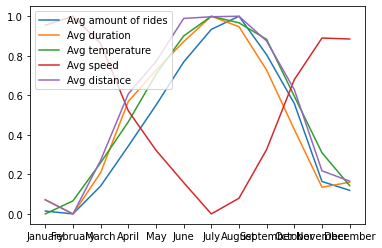

In [ ]:
#plotting the normalized rides_per_month, avg_duration_per_month and the avg_temp_per_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x = months
y1 = rides_per_month_norm
y2 = duration_per_month_norm
y3 = avg_temp_norm
y4 = avg_speed_per_month_norm
y5 = avg_distance_per_month_norm

plt.plot(x, y1, label="Avg amount of rides")
plt.plot(x, y2, label="Avg duration")
plt.plot(x, y3, label="Avg temperature")
plt.plot(x, y4, label="Avg speed")
plt.plot(x, y5, label="Avg distance")

plt.legend(loc="upper left")

plt.show()

## Analysis of the features in dependence of the week

### Extract week day as String and numeral from start time

In [ ]:
chicago_set_merge['day_of_week_name'] = chicago_set_merge['start_time'].dt.day_name()
chicago_set_merge['day_of_week'] = chicago_set_merge['start_time'].dt.dayofweek
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,...,speed,start_month,start_day,start_hour,index,max_temp,min_temp,precip,day_of_week_name,day_of_week
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,...,6.165046,1,1,0,35040.0,2.8,2.2,1.0,Tuesday,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,...,0.369012,1,1,0,35040.0,2.8,2.2,1.0,Tuesday,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,...,3.989336,1,1,0,35040.0,2.8,2.2,1.0,Tuesday,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,...,4.108406,1,1,0,35040.0,2.8,2.2,1.0,Tuesday,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,...,2.963746,1,1,0,35040.0,2.8,2.2,1.0,Tuesday,1


### Hot-encode weekday: turn number for day into boolean

In [ ]:
chicago_set_merge['monday'] = np.where(chicago_set_merge['day_of_week'] == 0, 1, 0) #[chicago_set['day_of_week'] == 1]
day = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'] # Katiaras
for i in range(0,7):
    chicago_set_merge[day[i]] = np.where(chicago_set_merge['day_of_week'] == i, 1, 0)
    
chicago_set_merge.sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,...,precip,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday,sunday
1054864,2019-06-05 16:20:42,2019-06-05 16:27:41,465,312,Marine Dr & Ainslie St,Clarendon Ave & Gordon Ter,197,Customer,0 days 00:06:59,41.971600,...,0.0,Wednesday,2,0,0,1,0,0,0,0
559325,2019-04-23 08:15:34,2019-04-23 08:39:12,86,49,Eckhart Park,Dearborn St & Monroe St,928,Subscriber,0 days 00:23:38,41.896373,...,NaN,Tuesday,1,0,1,0,0,0,0,0
1124418,2019-06-09 18:45:23,2019-06-09 19:00:00,188,318,Greenview Ave & Fullerton Ave,Southport Ave & Irving Park Rd,5301,Customer,0 days 00:14:37,41.925330,...,0.0,Sunday,6,0,0,0,0,0,0,1
2587223,2019-08-31 15:10:35,2019-08-31 15:29:32,232,177,Pine Grove Ave & Waveland Ave,Theater on the Lake,1288,Customer,0 days 00:18:57,41.949473,...,0.0,Saturday,5,0,0,0,0,0,1,0
3007355,2019-09-25 12:20:47,2019-09-25 12:27:33,238,293,Wolcott (Ravenswood) Ave & Montrose Ave,Broadway & Wilson Ave,4873,Subscriber,0 days 00:06:46,41.961406,...,0.0,Wednesday,2,0,0,1,0,0,0,0


### Connections between days of the week and user behavior

In [ ]:
rides_started_per_weekday = chicago_set_merge['start_time'].groupby(chicago_set_merge['start_time'].dt.day_name()).agg('count')
rides_started_per_weekday = rides_started_per_weekday / 52
# because there are 52 weeks per year
avg_duration_per_weekday = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.day_name())['duration'].mean(numeric_only=False)
avg_speed_per_weekday = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.day_name())['speed'].mean()
avg_distance_per_weekday = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.day_name())['distance'].mean()


In [ ]:
# Normalize ridea_started_per_weekday
range_rides_started_per_weekday = max(rides_started_per_weekday)-min(rides_started_per_weekday)
rides_started_per_weekday_norm = (rides_started_per_weekday - min(rides_started_per_weekday))/range_rides_started_per_weekday

# Normalize avg_duration_per_weekday
range_avg_duration_per_weekday = max(avg_duration_per_weekday)-min(avg_duration_per_weekday)
avg_duration_per_weekday_norm = (avg_duration_per_weekday - min(avg_duration_per_weekday))/range_avg_duration_per_weekday

# Normalize avg_speed_per_weekday
range_avg_speed_per_weekday = max(avg_speed_per_weekday)-min(avg_speed_per_weekday)
avg_speed_per_weekday_norm = (avg_speed_per_weekday - min(avg_speed_per_weekday))/range_avg_speed_per_weekday

# Normalize avg_distance_per_weekday
range_avg_distance_per_weekday = max(avg_distance_per_weekday)-min(avg_distance_per_weekday)
avg_distance_per_weekday_norm = (avg_distance_per_weekday - min(avg_distance_per_weekday))/range_avg_distance_per_weekday


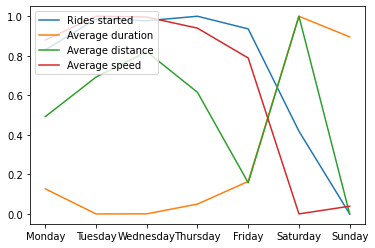

In [ ]:
x  = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

y1 = [rides_started_per_weekday_norm[1], rides_started_per_weekday_norm[5],rides_started_per_weekday_norm[6],
                           rides_started_per_weekday_norm[4],rides_started_per_weekday_norm[0],rides_started_per_weekday_norm[2],
                           rides_started_per_weekday_norm[3]]
y2 = [avg_duration_per_weekday_norm[1], avg_duration_per_weekday_norm[5],avg_duration_per_weekday_norm[6],
                           avg_duration_per_weekday_norm[4],avg_duration_per_weekday_norm[0],avg_duration_per_weekday_norm[2],
                           avg_duration_per_weekday_norm[3]]
y3 = [avg_distance_per_weekday_norm[1], avg_distance_per_weekday_norm[5],avg_distance_per_weekday_norm[6],
                           avg_distance_per_weekday_norm[4],avg_distance_per_weekday_norm[0],avg_distance_per_weekday_norm[2],
                           avg_distance_per_weekday_norm[3]]
y4 = [avg_speed_per_weekday_norm[1], avg_speed_per_weekday_norm[5],avg_speed_per_weekday_norm[6],
                           avg_speed_per_weekday_norm[4],avg_speed_per_weekday_norm[0],avg_speed_per_weekday_norm[2],
                           avg_speed_per_weekday_norm[3]]


plt.plot(x, y1, label="Rides started")
plt.plot(x, y2, label="Average duration")
plt.plot(x, y3, label="Average distance")
plt.plot(x, y4, label="Average speed")
plt.legend(loc="upper left")

plt.show()

Wee see that during the week we have nearly constantly around 11k rides per weekday, during the weekend this number drops to around 9k rides per day with a low on Sundays.

Although we see that there are less rides on the weekend, the average duration is ca. 50% higher than during the week.
In the next step, we want to draw both graphs in one diagram and also change the sequence from alphabetically to standard Mo-Sun view. Therefore, we normalize our data with this formula: xnormalized = (x - xminimum) / range of x .

In the next step, we'll change the sequence. Python ordered the data alphabetically, but for us humans it's more intuitive to have a week from "Monday" till "Sunday" (at least in Europe).

## Analysis of the features in dependence of the hour

In [ ]:
rides_per_hour = chicago_set_merge['start_time'].groupby(chicago_set_merge['start_time'].dt.hour).agg('count')
avg_duration_per_hour = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.hour)['duration'].mean(numeric_only=False)
avg_speed_per_hour = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.hour)['speed'].mean()
avg_distance_per_hour = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.hour)['distance'].mean()


We see two spikes of usage during the day: our services is getting used the most between 5am and 10 am and between 3pm and 7pm. We can assume that our users rent our bikes to get to the university/school/workplace or home. 

In [ ]:
avg_duration_per_hour = chicago_set_merge.groupby(chicago_set_merge['start_time'].dt.hour)['duration'].mean(numeric_only=False)
# print(avg_duration_per_hour)
# plt.plot(avg_duration_per_hour)

We see a peak between 3 and 4am, so maybe drunk people need to get home and rely on our service.

In [ ]:
# normalize the rides_per_hour
range_rides_per_hour = max(rides_per_hour)-min(rides_per_hour)
rides_per_hour_norm = (rides_per_hour - min(rides_per_hour))/range_rides_per_hour

# normalize the average_duration_per_hour
range_avg_duration_per_hour = max(avg_duration_per_hour)-min(avg_duration_per_hour)
duration_per_hour_norm = (avg_duration_per_hour - min(avg_duration_per_hour))/range_avg_duration_per_hour

# normalize the avg_speed_per_hour
range_avg_speed_per_hour = max(avg_speed_per_hour)-min(avg_speed_per_hour)
avg_speed_per_hour_norm = (avg_speed_per_hour - min(avg_speed_per_hour))/range_avg_speed_per_hour

# normalize the avg_distance_per_hour
range_avg_distance_per_hour = max(avg_distance_per_hour)-min(avg_distance_per_hour)
avg_distance_per_hour_norm = (avg_distance_per_hour - min(avg_distance_per_hour))/range_avg_distance_per_hour


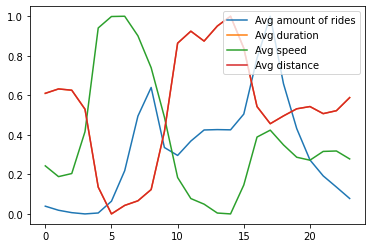

In [ ]:
#plotting the normalized rides_per_month, avg_duration_per_month and the avg_temp_per_month

y1 = rides_per_hour_norm
y2 = duration_per_hour_norm
y3 = avg_speed_per_hour_norm
y4 = avg_distance_per_hour_norm

plt.plot(y1, label="Avg amount of rides")
plt.plot(y2, label="Avg duration")
plt.plot(y3, label="Avg speed")
plt.plot(y2, label="Avg distance")

plt.legend(loc="upper right")

plt.show()

## Analysis of the geographical data

### Visualizing the amount of trips started/ended per station

This should help us to improve the understanding of the location data before we'll visualize this in a heatmap in the further steps.

In [ ]:
amount_of_start_stations = len(chicago_set_merge['start_station_id'].unique())
print(amount_of_start_stations)

amount_of_end_stations = len(chicago_set_merge['end_station_id'].unique())
print(amount_of_end_stations)

612
612


In [ ]:
chicago_set_merge.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,start_latitude,...,precip,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,41.891466,...,1.0,Tuesday,1,0,1,0,0,0,0,0
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,41.884730,...,1.0,Tuesday,1,0,1,0,0,0,0,0
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,41.858166,...,1.0,Tuesday,1,0,1,0,0,0,0,0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,41.922695,...,1.0,Tuesday,1,0,1,0,0,0,0,0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,41.896910,...,1.0,Tuesday,1,0,1,0,0,0,0,0


In [ ]:
rides_started_per_station = chicago_set_merge['start_station_id'].groupby(chicago_set_merge['start_station_id']).agg('count')
rides_ended_per_station = chicago_set_merge['end_station_id'].groupby(chicago_set_merge['end_station_id']).agg('count')

avg_duration_per_start_station = chicago_set_merge.groupby(chicago_set_merge['start_station_id'])['duration'].mean(numeric_only=False)
avg_duration_per_end_station = chicago_set_merge.groupby(chicago_set_merge['end_station_id'])['duration'].mean(numeric_only=False)

avg_distance_per_start_station = chicago_set_merge.groupby(chicago_set_merge['start_station_id'])['distance'].mean()
avg_distance_per_end_station = chicago_set_merge.groupby(chicago_set_merge['end_station_id'])['distance'].mean()

avg_speed_per_start_station = chicago_set_merge.groupby(chicago_set_merge['start_station_id'])['speed'].mean()
avg_speed_per_end_station =  chicago_set_merge.groupby(chicago_set_merge['end_station_id'])['speed'].mean()


In [ ]:
# normalize the rides_per_station
range_rides_started_per_station = max(rides_started_per_station)-min(rides_started_per_station)
rides_started_per_station_norm = (rides_started_per_station - min(rides_started_per_station))/range_rides_started_per_station

range_rides_ended_per_station = max(rides_ended_per_station)-min(rides_ended_per_station)
rides_ended_per_station_norm = (rides_ended_per_station - min(rides_ended_per_station))/range_rides_ended_per_station


# normalize the average_duration_per_month
range_avg_duration_per_start_station = max(avg_duration_per_start_station)-min(avg_duration_per_start_station)
avg_duration_per_start_station_norm = (avg_duration_per_start_station - min(avg_duration_per_start_station))/range_avg_duration_per_start_station

range_avg_duration_per_end_station = max(avg_duration_per_end_station)-min(avg_duration_per_end_station)
avg_duration_per_end_station_norm = (avg_duration_per_end_station - min(avg_duration_per_end_station))/range_avg_duration_per_end_station



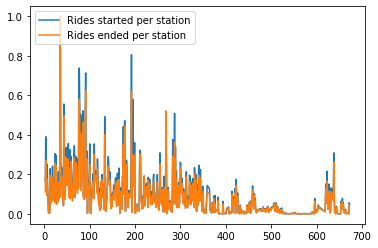

In [ ]:
y1 = rides_started_per_station_norm
y2 = rides_ended_per_station_norm
plt.plot(y1, label="Rides started per station")
plt.plot(y2, label="Rides ended per station")
plt.legend(loc="upper left")

plt.show()

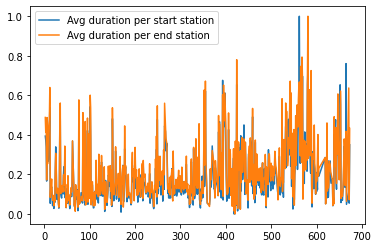

In [ ]:
y3 = avg_duration_per_start_station_norm
y4 = avg_duration_per_end_station_norm

plt.plot(y3, label="Avg duration per start station")
plt.plot(y4, label="Avg duration per end station")

plt.legend(loc="upper left")

plt.show()

There are 616 unique start_station_ids and 617 end_station_ids. We visualized the amount of rides started/ended per stations and see that some stations are more popular than others. We will analyze this investigation in the further steps and visualize it with a heatmap.

### Heatmap

To be able to work with the individual traffic for each station in the heatmap, we have to calculate the total amount of usage (rides started and ended) for each station as followed.

In [ ]:
amount_started = pd.DataFrame({'count' : chicago_set.groupby( [ "start_station_id"] ).size()}).reset_index()
amount_ended = pd.DataFrame({'count' : chicago_set.groupby( [ "end_station_id"] ).size()}).reset_index()


print(amount_started)
print(amount_ended)

#merge amount_started and amount_ended together, as total_amount

amount_merged = amount_started.merge(amount_ended, how='left', left_on=['start_station_id'], right_on = ['end_station_id']) 
amount_merged['total_amount'] = amount_merged['count_x'] + amount_merged['count_y']



coordinates_unique = coordinates_unique.merge(amount_merged, how='left', left_on=['station_id'], right_on = ['start_station_id'])
coordinates_unique = coordinates_unique.dropna()


station_data = pd.DataFrame(coordinates_unique[['latitude', 'longitude']])
station_data['total_amount'] = pd.DataFrame(amount_merged[['total_amount']])
print(station_data)

print(station_data.max())



# converting the dataframe into a numpy array changes the values into exponential view, however the values
# are not affected by this
data_array = station_data[['latitude','longitude','total_amount']].to_numpy()
print(data_array)


     start_station_id  count
0                   1      1
1                   2  11030
2                   3  26432
3                   4  10658
4                   5   7765
..                ...    ...
611               666    543
612               669      1
613               671     15
614               672   3821
615               673   3390

[616 rows x 2 columns]
     end_station_id  count
0                 1      1
1                 2   9283
2                 3  22184
3                 4  11042
4                 5   7615
..              ...    ...
612             666    582
613             669      1
614             671    157
615             672   3813
616             673   3489

[617 rows x 2 columns]
      latitude  longitude  total_amount
0    41.765286 -87.621748           2.0
2    41.816208 -87.634819       48616.0
5    41.786833 -87.666215       31449.0
6    41.766000 -87.611726       20480.0
8    41.786691 -87.655859         441.0
..         ...        ...           ...


Now that the data is correctly ordered and available we are able to create a heatmap which will give us a nice overview of the total amount of bike trips started from the 617 different stations all over chicago. This heatmap is created by using the folium library.

In [ ]:
! pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
amount_started = pd.DataFrame({'count' : chicago_set.groupby( [ "start_station_id"] ).size()}).reset_index()
amount_ended = pd.DataFrame({'count' : chicago_set.groupby( [ "end_station_id"] ).size()}).reset_index()


print(amount_started)
print(amount_ended)

#merge amount_started and amount_ended together, as total_amount

amount_merged = amount_started.merge(amount_ended, how='left', left_on=['start_station_id'], right_on = ['end_station_id']) 
amount_merged['total_amount'] = amount_merged['count_x'] + amount_merged['count_y']



coordinates_unique = coordinates_unique.merge(amount_merged, how='left', left_on=['station_id'], right_on = ['start_station_id'])
coordinates_unique = coordinates_unique.dropna()


 

station_data = pd.DataFrame(coordinates_unique[['latitude', 'longitude']])
station_data['total_amount'] = pd.DataFrame(amount_merged[['total_amount']])
print(station_data)

print(station_data.max())



# converting the dataframe into a numpy array changes the values into exponential view, however the values
# are not affected by this
data_array = station_data[['latitude','longitude','total_amount']].to_numpy()
print(data_array)
import folium

from folium import features
from folium import plugins
from folium.plugins import HeatMap

data = data_array


# creating a map object for further use and visualization
mapChicago = folium.Map([41.881832, -87.623177], zoom_start = 12)

#we can specify the colouring intensity (according to the total amount of rides for each station) in the following way

mapChicago.add_child(HeatMap(data,radius = 8, gradient={0: 'navy', 0.25:'blue', 0.5: 'lime', 0.75: 'orange', 1: 'red'}))


# a data column consists of the latitude and longitude of the station, the intensity is determined by the amount of times this specific station
# was used (the total amount of rides(started + ended) per station)
HeatMap(data).add_to(mapChicago)

# the heatmap can also be viewed under this file below which gets saved in the local folder
mapChicago.save("ChicagoHeatmap.html")

# this gives us a rough idea about where the more popular areas for bike trips in chicago are located and in which areas
# there was less bike traffic in 2019
mapChicago

     start_station_id  count
0                   1      1
1                   2  11030
2                   3  26432
3                   4  10658
4                   5   7765
..                ...    ...
611               666    543
612               669      1
613               671     15
614               672   3821
615               673   3390

[616 rows x 2 columns]
     end_station_id  count
0                 1      1
1                 2   9283
2                 3  22184
3                 4  11042
4                 5   7615
..              ...    ...
612             666    582
613             669      1
614             671    157
615             672   3813
616             673   3489

[617 rows x 2 columns]
      latitude  longitude  total_amount
0    41.765286 -87.621748             2
1    41.816208 -87.634819         20313
2    41.786833 -87.666215         48616
3    41.766000 -87.611726         21700
4    41.786691 -87.655859         15380
..         ...        ...           ...


## Clustering our complete dataset

#### Maybe don't save all the data for example dropping start and end station names and only saving id's will probably reduce file size quite a bit while not losing information
#### An additional csv with only unique station id's & names could be saved instead to later on convert the id back into a name

### Turn time data into cyclic data and duration into a int

In [ ]:
chicago_set_merge['duration_in_seconds'] = chicago_set_merge['duration'].dt.total_seconds()

chicago_set_merge['start_minute'] = pd.to_datetime(chicago_set_merge['start_time']).dt.minute
chicago_set_merge['minute_sin'] = np.sin(2 * np.pi * chicago_set_merge['start_minute']/59.0)
chicago_set_merge['minute_cos'] = np.cos(2 * np.pi * chicago_set_merge['start_minute']/59.0)
chicago_set_merge['hour_sin'] = np.sin(2 * np.pi * chicago_set_merge['start_hour']/23.0)
chicago_set_merge['hour_cos'] = np.cos(2 * np.pi * chicago_set_merge['start_hour']/23.0)
chicago_set_merge['month_sin'] = np.sin(2 * np.pi * chicago_set_merge['start_month']/11.0)
chicago_set_merge['month_cos'] = np.cos(2 * np.pi * chicago_set_merge['start_month']/11.0)

In [ ]:
# Save the processed to file to CSV for easier loading later on
chicago_set_merge.to_csv('chicago_set_merge.csv', index_label = True)

In [ ]:
# Uncomment and run me only if you want to do clustering. If you play code from the very beginning, leave these lines untouched

chicago_set_merge = pd.read_csv('chicago_set_merge.csv')
chicago_set_merge['duration'] = pd.to_timedelta(chicago_set_merge['duration'])
chicago_set_merge.head()

,True,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,...,saturday,sunday,duration_in_seconds,start_minute,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos
0,0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,...,0,0,390.0,4,0.413212,0.910635,0.0,1.0,0.540641,0.841254
1,1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,...,0,0,441.0,8,0.752571,0.658511,0.0,1.0,0.540641,0.841254
2,2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,...,0,0,829.0,13,0.982684,0.185289,0.0,1.0,0.540641,0.841254
3,3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,...,0,0,1783.0,13,0.982684,0.185289,0.0,1.0,0.540641,0.841254
4,4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,...,0,0,364.0,14,0.996812,0.079786,0.0,1.0,0.540641,0.841254


In [ ]:
chicago_set_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779990 entries, 0 to 3779989
Data columns (total 40 columns):
 #   Column               Dtype          
---  ------               -----          
 0   True                 int64          
 1   start_time           object         
 2   end_time             object         
 3   start_station_id     int64          
 4   end_station_id       int64          
 5   start_station_name   object         
 6   end_station_name     object         
 7   bike_id              int64          
 8   user_type            object         
 9   duration             timedelta64[ns]
 10  start_latitude       float64        
 11  start_longitude      float64        
 12  end_latitude         float64        
 13  end_longitude        float64        
 14  distance             float64        
 15  speed                float64        
 16  start_month          int64          
 17  start_day            int64          
 18  start_hour           int64          
 19  

In [ ]:
clustering_set = chicago_set_merge[['distance', 'duration_in_seconds', 'minute_sin', 'minute_cos', 
                                    'hour_sin', 'hour_cos', 'month_sin', 'month_cos' 
                                   ]]
                                     # 'start_station_id', 'end_station_id', 'precip'

clustering_set = clustering_set.dropna()

# one-hot-encode user_type, start and end_station_id and add the new columns to the clustering data set
clustering_set = pd.concat([clustering_set, pd.get_dummies(chicago_set_merge['user_type'], prefix='user_type', drop_first=True)], axis=1)
#clustering_set = pd.concat([clustering_set, pd.get_dummies(clustering_set['start_station_id'], prefix='start_station', drop_first=True)], axis=1)
#clustering_set = pd.concat([clustering_set, pd.get_dummies(clustering_set['end_station_id'], prefix='end_station', drop_first=True)], axis=1)
#clustering_set = clustering_set.drop(['start_station_id', 'end_station_id'], axis = 1)

# Add the total trip duration in minutes to the data set
# clustering_set['duration_in_min'] = chicago_set_merge['duration'].dt.total_seconds() % 3600

clustering_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779990 entries, 0 to 3779989
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   distance              float64
 1   duration_in_seconds   float64
 2   minute_sin            float64
 3   minute_cos            float64
 4   hour_sin              float64
 5   hour_cos              float64
 6   month_sin             float64
 7   month_cos             float64
 8   user_type_Subscriber  uint8  
dtypes: float64(8), uint8(1)
memory usage: 263.2 MB


# Clustering

In [ ]:
# Chicago City center longitute and latitude 41.8781° N, 87.6298° W
clustering_set['start_distance_from_center'] = chicago_set_merge.apply(lambda x : haversine(x['start_latitude'], x['start_longitude'], 41.8781, -87.6298,) , axis=1)
clustering_set['end_distance_from_center'] = chicago_set_merge.apply(lambda x : haversine(x['end_latitude'], x['end_longitude'], 41.8781, -87.6298,) , axis=1)


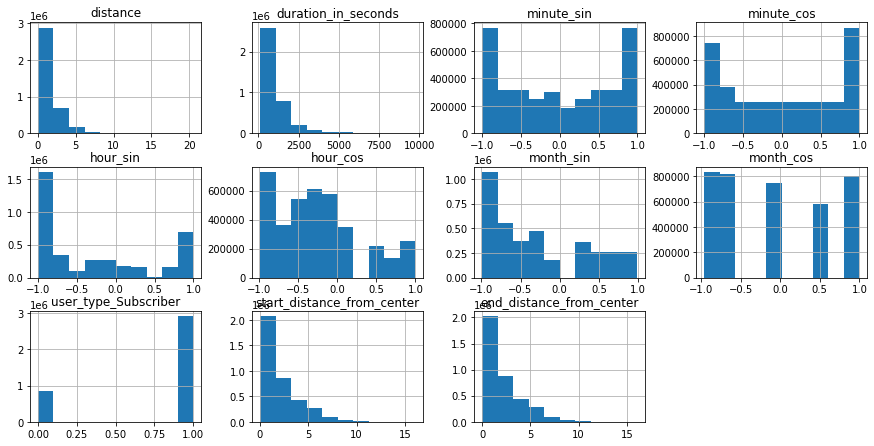

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd

clustering_set.hist(layout=(4,4), figsize=(15,10))

plt.show()

Because it's not possible to cluster timestamp data, we'll add three more columns which will include the information month, hour and minute of the ride.

From analysing the distributions above, we can see that:
1. during the summer months, the total amount of bike trips is much higher
2. the duration of trips is overall small

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
clustering_set = clustering_set.dropna()
clustering_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779990 entries, 0 to 3779989
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   distance                    float64
 1   duration_in_seconds         float64
 2   minute_sin                  float64
 3   minute_cos                  float64
 4   hour_sin                    float64
 5   hour_cos                    float64
 6   month_sin                   float64
 7   month_cos                   float64
 8   user_type_Subscriber        uint8  
 9   start_distance_from_center  float64
 10  end_distance_from_center    float64
dtypes: float64(10), uint8(1)
memory usage: 320.8 MB


In [ ]:
from sklearn import preprocessing

# x_set = clustering_set[['start_month', 'duration_in_min']]
x_set = clustering_set #[['duration_in_seconds', 'distance', 'end_distance_from_center']]
original_x = x_set.iloc[:,:].values

scaler = preprocessing.MinMaxScaler()
x_set_norm = x_set.copy()
#x_set_norm[['duration_in_seconds', 'distance', 'start_station_id', 'end_station_id']] = scaler.fit_transform(x_set_norm[['duration_in_seconds', 'distance', 'start_station_id', 'end_station_id']])
x_set_norm[['duration_in_seconds', 'distance', 'start_distance_from_center', 'end_distance_from_center']] = scaler.fit_transform(x_set_norm[['duration_in_seconds', 'distance', 'start_distance_from_center', 'end_distance_from_center']])
x = x_set_norm.iloc[:,:].values

x_set_norm.head()

,distance,duration_in_seconds,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos,user_type_Subscriber,start_distance_from_center,end_distance_from_center
0,0.117013,0.029152,0.413212,0.910635,0.0,1.0,0.540641,0.841254,1,0.020997,0.128213
1,0.007920,0.034443,0.752571,0.658511,0.0,1.0,0.540641,0.841254,1,0.014048,0.004127
2,0.160948,0.074697,0.982684,0.185289,0.0,1.0,0.540641,0.841254,1,0.184335,0.389920
3,0.356497,0.173669,0.982684,0.185289,0.0,1.0,0.540641,0.841254,1,0.465592,0.012099
4,0.052502,0.026455,0.996812,0.079786,0.0,1.0,0.540641,0.841254,1,0.055614,0.122503


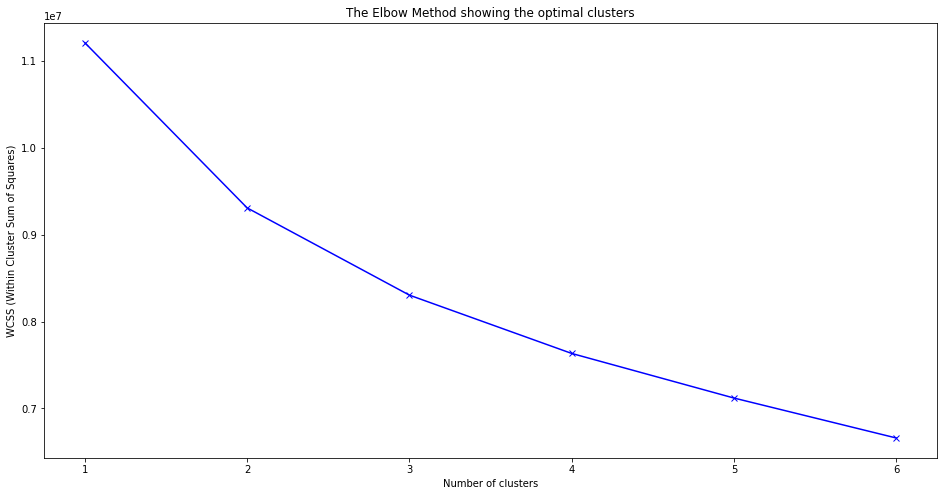

In [ ]:
# Using the elbow method to find the optimal number of clusters
# wcss = within cluster sum of squares
wcss = []
rangeOfClusters = range(1, 7)
for i in rangeOfClusters:
    kmeans = KMeans(n_clusters = i, init = 'k-means++') # We use k-means++ in order to avoid random initialization trap
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(rangeOfClusters, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

Using the 'Elbow Method', the optimal number of clusters is between 2 and 3. 
We decided to use 3 clusters instead.

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(x)


In [ ]:
labels = pd.DataFrame(clusters)
labeled_trips = pd.concat((x_set,labels),axis=1)
labeled_trips = labeled_trips.rename({0:'cluster'},axis=1)

labeled_trips.loc[labeled_trips['cluster'] == 0].describe() # we can use similar approach for analysing the cluster

,distance,duration_in_seconds,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos,user_type_Subscriber,start_distance_from_center,end_distance_from_center,cluster
count,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1.281055e+06,1281055.0
mean,1.465140e+00,1.115178e+03,-5.113738e-02,6.467169e-01,-7.576627e-01,-1.044593e-01,-3.068314e-01,-1.595623e-01,7.349887e-01,2.062344e+00,2.284599e+00,0.0
std,1.408064e+00,1.151285e+03,6.887017e-01,3.237785e-01,2.916638e-01,5.744285e-01,6.489529e-01,6.776836e-01,4.413394e-01,1.952056e+00,2.052078e+00,0.0
min,0.000000e+00,1.090000e+02,-9.996456e-01,-1.327255e-01,-9.976688e-01,-9.906859e-01,-9.898214e-01,-9.594930e-01,0.000000e+00,5.862819e-03,5.862819e-03,0.0
25%,4.796608e-01,4.360000e+02,-7.525708e-01,3.888242e-01,-9.790841e-01,-5.766803e-01,-9.096320e-01,-6.548607e-01,0.000000e+00,6.329730e-01,6.783746e-01,0.0
50%,1.091707e+00,7.590000e+02,-2.449294e-16,7.347742e-01,-8.878852e-01,-6.824241e-02,-5.406408e-01,-1.423148e-01,1.000000e+00,1.451932e+00,1.629494e+00,0.0
75%,2.006254e+00,1.368000e+03,5.963674e-01,9.493976e-01,-6.310879e-01,2.034560e-01,2.817326e-01,4.154150e-01,1.000000e+00,2.778476e+00,3.244137e+00,0.0
max,1.805840e+01,9.748000e+03,9.826841e-01,1.000000e+00,7.308360e-01,1.000000e+00,9.898214e-01,1.000000e+00,1.000000e+00,1.608468e+01,1.608468e+01,0.0


In [ ]:
labeled_trips.loc[labeled_trips['cluster'] == 1].describe()

,distance,duration_in_seconds,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos,user_type_Subscriber,start_distance_from_center,end_distance_from_center,cluster
count,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1.215632e+06,1215632.0
mean,1.468956e+00,1.127840e+03,1.256200e-01,-6.456422e-01,-7.535931e-01,-1.071296e-01,-3.042204e-01,-1.592639e-01,7.313233e-01,2.070321e+00,2.295896e+00,1.0
std,1.414464e+00,1.167748e+03,6.845262e-01,3.143089e-01,2.966965e-01,5.767081e-01,6.496205e-01,6.782911e-01,4.432716e-01,1.955474e+00,2.056850e+00,0.0
min,0.000000e+00,1.090000e+02,-9.911528e-01,-9.985827e-01,-9.976688e-01,-9.906859e-01,-9.898214e-01,-9.594930e-01,0.000000e+00,5.862819e-03,5.862819e-03,1.0
25%,4.777281e-01,4.390000e+02,-5.528001e-01,-9.313362e-01,-9.790841e-01,-5.766803e-01,-9.096320e-01,-6.548607e-01,0.000000e+00,6.342863e-01,7.051915e-01,1.0
50%,1.092299e+00,7.670000e+02,1.590635e-01,-6.976315e-01,-8.878852e-01,-6.824241e-02,-5.406408e-01,-1.423148e-01,1.000000e+00,1.451932e+00,1.629494e+00,1.0
75%,2.016804e+00,1.379000e+03,7.865516e-01,-4.373073e-01,-6.310879e-01,2.034560e-01,2.817326e-01,4.154150e-01,1.000000e+00,2.778476e+00,3.251961e+00,1.0
max,2.054794e+01,9.748000e+03,9.996456e-01,7.978611e-02,7.308360e-01,1.000000e+00,9.898214e-01,1.000000e+00,1.000000e+00,1.608468e+01,1.608468e+01,1.0


In [ ]:
labeled_trips.loc[labeled_trips['cluster'] == 2].describe()

,distance,duration_in_seconds,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos,user_type_Subscriber,start_distance_from_center,end_distance_from_center,cluster
count,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1.283303e+06,1283303.0
mean,1.448980e+00,9.345648e+02,-6.215892e-02,1.302900e-02,6.161263e-01,-6.045473e-01,-2.487122e-01,-7.757723e-02,8.468795e-01,2.225024e+00,1.884892e+00,2.0
std,1.380062e+00,1.044460e+03,7.246228e-01,6.862136e-01,3.641571e-01,3.497153e-01,6.633509e-01,7.014915e-01,3.601038e-01,2.038475e+00,1.876436e+00,0.0
min,0.000000e+00,1.090000e+02,-9.996456e-01,-9.985827e-01,-3.984011e-01,-9.906859e-01,-9.898214e-01,-9.594930e-01,0.000000e+00,5.862819e-03,5.862819e-03,2.0
25%,4.955910e-01,3.770000e+02,-7.865516e-01,-6.175246e-01,3.984011e-01,-9.172113e-01,-9.096320e-01,-6.548607e-01,1.000000e+00,7.440389e-01,5.976227e-01,2.0
50%,1.081508e+00,6.240000e+02,-1.062935e-01,-2.662052e-02,8.169699e-01,-5.766803e-01,-5.406408e-01,-1.423148e-01,1.000000e+00,1.451932e+00,1.225459e+00,2.0
75%,1.923337e+00,1.082000e+03,6.783118e-01,6.585114e-01,9.422609e-01,-3.348796e-01,2.817326e-01,4.154150e-01,1.000000e+00,3.219813e+00,2.599737e+00,2.0
max,1.710913e+01,9.748000e+03,9.996456e-01,1.000000e+00,9.976688e-01,9.629173e-01,9.898214e-01,1.000000e+00,1.000000e+00,1.608468e+01,1.608468e+01,2.0


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


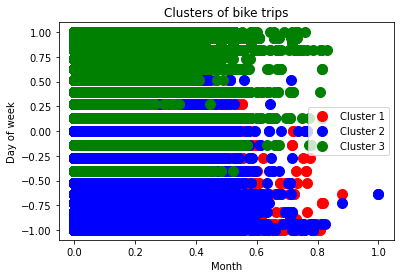

In [ ]:
import matplotlib.pyplot as plt

# Visualising the clusters
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of bike trips')
plt.xlabel('Month')
plt.ylabel('Day of week')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


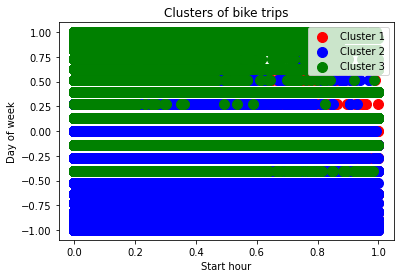

In [ ]:
# Visualising the clusters
plt.scatter(x[clusters == 0, 1], x[clusters == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[clusters == 1, 1], x[clusters == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[clusters == 2, 1], x[clusters == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of bike trips')
plt.xlabel('Start hour')
plt.ylabel('Day of week')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


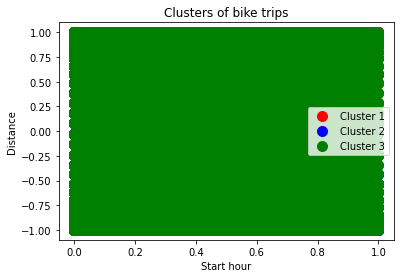

In [ ]:
# Visualising the clusters
plt.scatter(x[clusters == 0, 1], x[clusters == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[clusters == 1, 1], x[clusters == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[clusters == 2, 1], x[clusters == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of bike trips')
plt.xlabel('Start hour')
plt.ylabel('Distance')
plt.legend()
plt.show()

From the graphs above we can observe that "Month" and "Day of week" are the most important attributes for our clustering. Although we tried to use other attributes as well (such as "Start hour", "Distance"), we didn't spot any obvious correlations.

On the first graph that shows correlation between days of week and months our clusters are more or less sepatated. It is to be pointed out that some of the points sre not completely separatable in 2D. Nevertheless, we can still see a clear pattern in the structure of the clusters: 

1. Cluster 1: these customers prefer bike rides mostly in the second part of the year, but only in the beginning of the week.

2. Cluster 2: customers that belong to this cluster performed their rides all year long and mostly during the first part of the week (weekdays).

2. Cluster 3: customers in this cluster prefer to ride all year long but mostly during the weekends.

# Predictive analytics

We now want to filter out the most popular station ID from the column 'start_station_id'. 
We want to use this column because we are interested in the area where the bike sharing has the most demand.

It would be false to consider the 'end_station_id', because for our purposes we do not care where the trip ends, but where it starts and thus how much demand there is for a given starting area.

In order to do this we just compute the mode of the 'start_station_id' column by calling the statistical **mode** function from the **scipy** library. 

*The mode of a set of data values is the value that appears most often*

In [ ]:
from scipy.stats.mstats import mode
import statistics

chicago_set_regresion = chicago_set_merge.copy()
most_popular_station_id = chicago_set_regresion['start_station_id'].mode()[0] # We use 0 index to only get the value
print(most_popular_station_id)

35


In [ ]:
chicago_set_regresion = chicago_set_regresion[chicago_set_regresion["start_station_id"] == most_popular_station_id]
chicago_set_regresion = chicago_set_regresion[['start_month', 'start_hour', 'day_of_week', 'max_temp', 'min_temp', 'precip']]
chicago_set_regresion['IsWeekday'] = chicago_set_regresion["day_of_week"].apply(lambda x:1 if x<= 4 else 0)
chicago_set_regresion.reset_index()

,index,start_month,start_hour,day_of_week,max_temp,min_temp,precip,IsWeekday
0,17,1,0,1,2.8,2.2,1.0,1
1,19,1,0,1,2.8,2.2,1.0,1
2,40,1,1,1,2.2,1.1,1.0,1
3,75,1,1,1,2.2,1.1,1.0,1
4,76,1,1,1,2.2,1.1,1.0,1
...,...,...,...,...,...,...,...,...
67074,3778255,12,9,1,-3.9,-3.9,1.0,1
67075,3778679,12,12,1,NaN,NaN,NaN,1
67076,3779384,12,16,1,-3.9,-3.9,0.0,1
67077,3779443,12,16,1,-3.9,-3.9,0.0,1


In [ ]:
chicago_set_regresion.dropna() # dropping any rows with missing values after merging datasets

,start_month,start_hour,day_of_week,max_temp,min_temp,precip,IsWeekday
17,1,0,1,2.8,2.2,1.0,1
19,1,0,1,2.8,2.2,1.0,1
40,1,1,1,2.2,1.1,1.0,1
75,1,1,1,2.2,1.1,1.0,1
76,1,1,1,2.2,1.1,1.0,1
...,...,...,...,...,...,...,...
3778040,12,7,1,-3.3,-3.9,0.0,1
3778255,12,9,1,-3.9,-3.9,1.0,1
3779384,12,16,1,-3.9,-3.9,0.0,1
3779443,12,16,1,-3.9,-3.9,0.0,1


At the moment our set represents individual bike rentals, i.e. there can be more than one rental that happened the same month, the same day of week and at the same hour. Thus, we'd like to group such entries together and calculate their total count by hour.

In [ ]:
regresion_df = chicago_set_regresion.groupby(['start_month', 'start_hour', 'IsWeekday', 'max_temp', 'min_temp', 'precip']).start_hour.agg('count').to_frame('number_of_rentals').reset_index()
# regresion_df.head()
regresion_df

,start_month,start_hour,IsWeekday,max_temp,min_temp,precip,number_of_rentals
0,1,0,1,2.8,2.2,1.0,2
1,1,1,0,6.1,6.1,0.0,1
2,1,1,1,-6.1,-6.1,0.0,1
3,1,1,1,0.0,0.0,1.0,1
4,1,1,1,2.2,1.1,1.0,3
...,...,...,...,...,...,...,...
3699,12,23,0,8.3,8.3,0.0,2
3700,12,23,1,3.9,3.9,0.0,1
3701,12,23,1,6.1,6.1,0.0,1
3702,12,23,1,10.0,10.0,0.0,1


Now our data is ready for the regresion models. 
We separate our features into 2 groups: 

Our Data frame now consists of:

1. Dependent (Y): 'number_of_rentals'
2. Independent (X): 'start_month', 'start_hour','IsWeekday', 'max_temp', 'min_temp', 'precip'

In [ ]:
# X = regresion_df.iloc[:, :-1]
# y = regresion_df.iloc[:, -1]

We want to also separate the set into training set, and testing set, in order to compare the accuracy of our prediction model. 
The test size is set to 20%. Namely, 80% of the data is used for training the model.

In [ ]:
from sklearn.model_selection import train_test_split

# In this first step, we only consider one column in our X set of features because we want to visualize our results.
# We are going to define X := regresion_df.iloc[:, :-1] in a next step once we are done visualizing.

X = regresion_df.iloc[:,1:2] 
y = regresion_df.iloc[:, -1]

# random_state is set to a fix value, in order to ensure all reruns give the same test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

###### Before we start with our Regression Models we first want to find out whether there are either linear or non-linear relationships in our data set.  To do so we plot a single independent variable correlated with the dependent variable and look at the trend of the data points. 

As an example we will take the start hour as the single independent variable.
Since it is at location 1 in our dataframe we use the interval [1:2] because the upper bound is excluded.

### Simple Linear Regression

In [ ]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

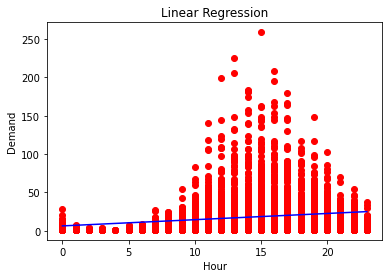

In [ ]:
# Visualising the Linear Regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.show()

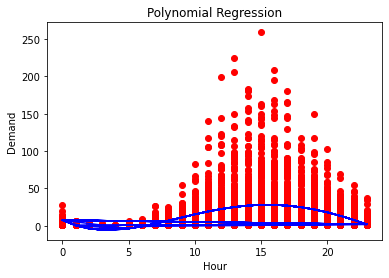

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Hour')
plt.ylabel('Demand')
plt.show()

As we can see the data does not behave linearly but rather grows first until it reaches its peak and then drops. 
The similar situation appears when we use another independent variable. 
In fact for the variable of the Maximum Temperature, the data grows exponentially. 
So there is definetly no linear behavior of our data set.

Lets try it with a nother Regression type: 
### K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=25)
KNN_model = KNN_reg.fit(X_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(X_test.values.reshape((-1,1)))

print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "GW")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "GW")  
print("R2:",r2_score(y_hat_KNN, y_test))

Test set performance:
MAE: 13.348124156545211 GW
RMSE: 21.822106039766105 GW
R2: -2.528246722594286


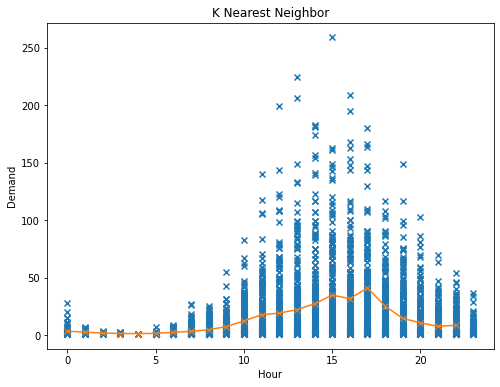

In [ ]:
# Visualize the results

plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.plot(np.arange(0,23,1), KNN_reg.predict(np.arange(0,23,1).reshape((-1,1))), marker="x", color='C1')
plt.xlabel("Hour")
plt.ylabel("Demand")
plt.title('K Nearest Neighbor')
plt.show()

### Lets see how LASSO regression performs

In [ ]:
from sklearn.linear_model import Lasso

model_L1 = Lasso(alpha = 1)

model_L1.fit(X, y)
predict = model_L1.predict(X)

print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

Coefficients  [0.77708506] 
Intercept  6.700194197037073


In [ ]:
Poly = PolynomialFeatures(degree = 50)

# function for plotting

def plot_scikit_output (x, y, fitted_model):
    
    min_x, max_x = x.min(), x.max()
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    xt0_poly = Poly.fit_transform(xt0.reshape(-1,1))
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, fitted_model.predict(xt0_poly), 'C1')
    plt.xlabel("Hour")
    plt.ylabel("Demand")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

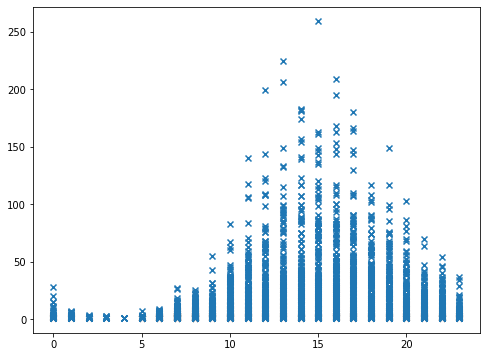

In [ ]:
plot_scikit_output(X , y, model_L1)

### Tree based regression:

In [ ]:
# Import the necessary modules and libraries

from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fit regression model
Tree_reg = DecisionTreeRegressor(max_depth=5)
tree_model = Tree_reg.fit(X_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_tree = tree_model.predict(X_test.values.reshape((-1,1)))

In [ ]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_tree, y_test), "GW")
print("RMSE:",(mean_squared_error(y_hat_tree, y_test))**(0.5), "GW")  
print("R2:",r2_score(y_hat_tree, y_test))


Test set performance:
MAE: 13.573429604509855 GW
RMSE: 21.594193046368797 GW
R2: -3.5814430647170443


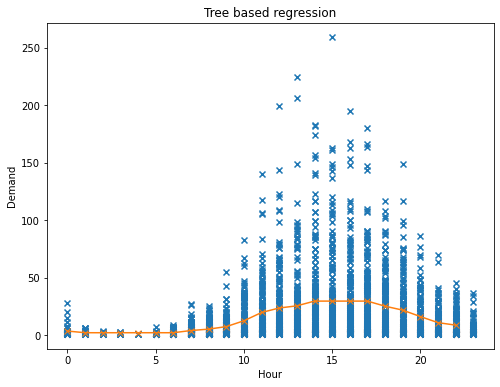

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, marker="x")
# plt.plot(np.arange(-18,40,1), Tree_reg.predict(np.arange(-18,40,1).reshape((-1,1))), marker="x", color='C1')
plt.plot(np.arange(0, 23 ,1), Tree_reg.predict(np.arange(0,23,1).reshape((-1,1))), marker="x", color='C1')

plt.xlabel("Hour")
plt.ylabel("Demand")
plt.title("Tree based regression")
plt.show()

It seems like that the line of the Tree Based Regression Model fits the data the best.
Lets check whether this behavior still occurs when multiple independent variables are considered to explain the hourly demand!

# In contrast to our previous steps we are now going to execute our Regression Models with multiple independent variables!

Our Data frame now consists of:

1. Dependent (Y): 'number_of_rentals'
2. Independent (X): 'start_month', 'start_hour','IsWeekday', 'max_temp', 'min_temp', 'precip'

In [ ]:
X = regresion_df.iloc[:, :-1]
y = regresion_df.iloc[:, -1]

In [ ]:
regresion_df

,start_month,start_hour,IsWeekday,max_temp,min_temp,precip,number_of_rentals
0,1,0,1,2.8,2.2,1.0,2
1,1,1,0,6.1,6.1,0.0,1
2,1,1,1,-6.1,-6.1,0.0,1
3,1,1,1,0.0,0.0,1.0,1
4,1,1,1,2.2,1.1,1.0,3
...,...,...,...,...,...,...,...
3699,12,23,0,8.3,8.3,0.0,2
3700,12,23,1,3.9,3.9,0.0,1
3701,12,23,1,6.1,6.1,0.0,1
3702,12,23,1,10.0,10.0,0.0,1


### Multiple Linear Regression

Training the Multiple Linear Regression model on the Training set:

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results:

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test.values),1)),1))

[[15.54 12.  ]
 [17.22 29.  ]
 [22.25 16.  ]
 ...
 [10.5   1.  ]
 [14.7   2.  ]
 [22.25 10.  ]]


#### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.016667268710346184

As expected the Multiple Linear Regression Model does not fit our data well because there are non-linear relationships in our data-set. 
Therefore we have a very low R² value which proves that the regression line doesn't fit our data at all.
As the output of the print-statement tells us the expected values (y_pred) differ significantly from the real observations (y_test).

### Polynomial Regression
Because we have non-linear relationships in our data-set we can not use a Linear Regression Model (E.g., Multiple Linear Regression). We will therefore use Polynomial Regression to predict future demand in the next hour.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Training the Polynomial Regression model on the whole dataset


poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
#train model
lin_mod.fit(X, y)

#make predictions using model
model_pred = lin_mod.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- IsWeekday
- max_temp
- min_temp
- precip
- start_month

  warnings.warn(message, FutureWarning)


ValueError: ignored

Lets see if our predictive model works. 
The first entry in the 'regresion_df' is:

In [ ]:
regresion_df.iloc[[55]]

Predicting a new result with Polynomial Regression:

In [ ]:
lin_reg.predict(poly_reg.fit_transform([[1, 12, 0, -0.6, -0.6, 0.0 ]]))

We predicted a demand of 6 bikes in a specific time stamp (The hour from 12-13 o' clock).

In [ ]:
regresion_df.iloc[[3500]]

In [ ]:
lin_reg.predict(poly_reg.fit_transform([[12, 8, 1, 5.0, 5.0, 0.0 ]]))

Here the predicted demand is around ~1. 

#### Evaluating the Model Performance

In [ ]:
r2_score(y_train, model_pred)

As we can see the Polynomial Regression performs significantly better than the Multiple Linear Regression!

### Ridge Regression


In [ ]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# implementation taken from https://www.statology.org/ridge-regression-in-python/

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')


In [ ]:
#fit model
model.fit(X, y)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
print(model.alpha_)

0.99


In [ ]:
from sklearn.linear_model import Ridge

model_L2 = Ridge(alpha = 0.01, normalize = True, solver = 'lsqr') # select least squares regression as solver
model_L2.fit(X_poly, y_train)
prediction = model_L2.predict(X_poly)

print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

ValueError: ignored

In [ ]:
print(model.alpha_)

In [ ]:
regresion_df.iloc[[97]]

In [ ]:
#define new observation
new_x = [1, 15, 1, -1.1, -1.7, 1.0]

#predict number of bike value using ridge regression model
model.predict([new_x])


In [ ]:
model.predict(X_test)

In [ ]:
regresion_df.iloc[[95]]

In [ ]:
#define new observation
new_x = [1, 15, 1, -3.3, -3.3, 0.0]

#predict number of bike value using ridge regression model
model.predict([new_x])

#### Evaluating the Model Performance

In [ ]:
r2_score(y_test, model.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- IsWeekday
- max_temp
- min_temp
- precip
- start_month

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
prediction = model_L2.predict(X_poly)
r2_score(y_test, prediction)

## KNN regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from seaborn import load_dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

clf = KNeighborsClassifier(p=1)

In [ ]:
# Fitting our model
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
print(predictions)

In [ ]:
r2_score(y_test, predictions)

## Tree based regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44) # create regression tree model
model.fit(X_train, y_train) # feed the train data to our model => Learns how to do predictions in the future on new data.

predictions = model.predict(X_test)

In [ ]:
regresion_df.iloc[[1643]]

In [ ]:
#define new observation
new_x2 = [6, 21, 0, 22.2, 21.7, 0.0]

#predict number of bike value using ridge regression model
model.predict([new_x2])

Lets predict another observation!

In [ ]:
regresion_df.iloc[[2352]]

In [ ]:
new_x3 = [8, 17, 0, 26.1, 26.1, 0.0]
model.predict([new_x3])

In [ ]:
# print(predictions)

We predicted 12 bike rentals which is the exact same value to the real observation!

In [ ]:
r2_score(y_test, predictions2)